In [102]:
!ls

CaseStudy4 - EDA LC.ipynb Untitled.ipynb            supervised_learning.ipynb
CaseStudy4_KMR.ipynb      data
README.md                 group.md


In [293]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
import sklearn.model_selection as cv
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score



In [294]:
df = pd.read_csv("data/churn_train.csv")

In [295]:
df.shape

(40000, 12)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                40000 non-null  float64
 1   avg_rating_by_driver    39838 non-null  float64
 2   avg_rating_of_driver    33472 non-null  float64
 3   avg_surge               40000 non-null  float64
 4   city                    40000 non-null  object 
 5   last_trip_date          40000 non-null  object 
 6   phone                   39681 non-null  object 
 7   signup_date             40000 non-null  object 
 8   surge_pct               40000 non-null  float64
 9   trips_in_first_30_days  40000 non-null  int64  
 10  luxury_car_user         40000 non-null  bool   
 11  weekday_pct             40000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [297]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [298]:
df.phone.value_counts()

iPhone     27628
Android    12053
Name: phone, dtype: int64

In [299]:
df.city.value_counts()

Winterfell        18620
Astapor           13236
King's Landing     8144
Name: city, dtype: int64

In [300]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [301]:
(df['last_trip_date'] >= pd.to_datetime('2014-06-01')) & (df['last_trip_date'] <= pd.to_datetime('2014-07-01'))

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997     True
39998    False
39999     True
Name: last_trip_date, Length: 40000, dtype: bool

In [302]:
df['active'] = (df['last_trip_date'] >= pd.to_datetime('2014-06-01')) & (df['last_trip_date'] <= pd.to_datetime('2014-07-01'))

In [303]:
df['active'] = df['active'].map(lambda x: 1 if x == True else 0)

In [304]:
df.active.value_counts()

0    24968
1    15032
Name: active, dtype: int64

In [305]:
df['luxury_car_user'] = df['luxury_car_user'].map(lambda x: 1 if x == True else 0)

<AxesSubplot:>

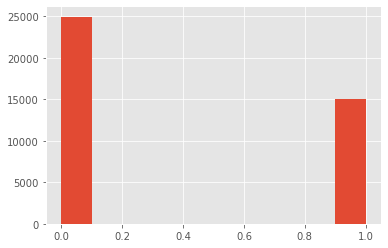

In [306]:
df['active'].hist()

In [307]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active
count,40000.000000,39838.000000,33472.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.777434,4.601697,1.074956,8.857342,2.280700,0.376150,60.874382,0.375800
std,5.708056,0.448088,0.614810,0.222427,20.014008,3.811289,0.484424,37.089619,0.484335
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,0.000000,33.300000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.000000,66.700000,0.000000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,1.000000,100.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.000000,100.000000,1.000000


In [308]:
df.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct', 'active'],
      dtype='object')

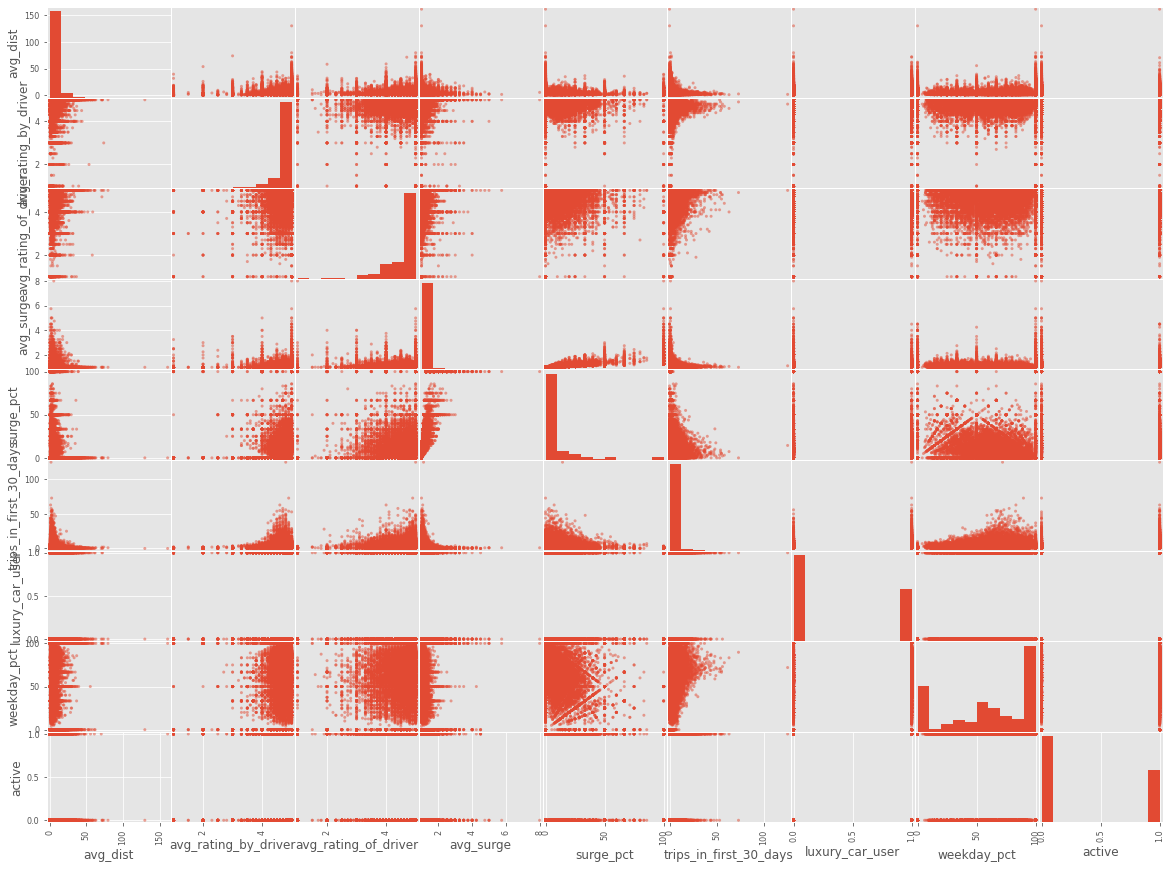

In [119]:
pd.plotting.scatter_matrix(df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge','signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct', 'active']],figsize=(20,15));

In [309]:
##drop last trip date
df_clean = df.drop('last_trip_date',axis=1)

<AxesSubplot:>

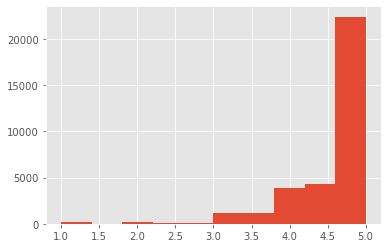

In [310]:
df_clean.avg_rating_of_driver.hist()

In [311]:
df_clean.avg_rating_of_driver.describe()

count    33472.000000
mean         4.601697
std          0.614810
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [312]:
df_clean['avg_rating_of_driver'] = df_clean['avg_rating_of_driver'].map(lambda x: df_clean['avg_rating_of_driver'].mean() if np.isnan(x) else x)

In [313]:
df_clean.avg_rating_of_driver.describe()

count    40000.000000
mean         4.601697
std          0.562407
min          1.000000
25%          4.500000
50%          4.700000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [314]:
df_clean = df_clean[df_clean['phone'].notna()]

In [315]:
df_clean.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active
0,6.94,5.0,5.000000,1.00,Astapor,Android,2014-01-12,0.0,0,0,100.0,0
1,8.06,5.0,5.000000,1.00,Astapor,Android,2014-01-25,0.0,2,1,0.0,0
2,21.50,4.0,4.601697,1.00,Winterfell,iPhone,2014-01-02,0.0,1,1,100.0,0
3,9.46,5.0,4.601697,2.75,Winterfell,Android,2014-01-09,100.0,1,0,100.0,0
4,13.77,5.0,4.601697,1.00,Winterfell,iPhone,2014-01-31,0.0,0,0,100.0,0


In [316]:
df_clean['avg_rating_by_driver'] = df_clean['avg_rating_by_driver'].map(lambda x: df_clean['avg_rating_by_driver'].mean() if np.isnan(x) else x)

In [317]:
df_clean['phone'] = df_clean['phone'].map(lambda x: 0 if x == 'Android' else 1)

In [318]:
df_clean_1 = pd.get_dummies(df_clean,columns = ['city'])

In [319]:
df_clean_1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active,city_Astapor,city_King's Landing,city_Winterfell
0,6.94,5.0,5.000000,1.00,0,2014-01-12,0.0,0,0,100.0,0,1,0,0
1,8.06,5.0,5.000000,1.00,0,2014-01-25,0.0,2,1,0.0,0,1,0,0
2,21.50,4.0,4.601697,1.00,1,2014-01-02,0.0,1,1,100.0,0,0,0,1
3,9.46,5.0,4.601697,2.75,0,2014-01-09,100.0,1,0,100.0,0,0,0,1
4,13.77,5.0,4.601697,1.00,1,2014-01-31,0.0,0,0,100.0,0,0,0,1


In [320]:
##drop city_Astapor
df_clean_1 = df_clean_1.drop('city_Astapor',axis=1)

# we now have the clean dataset!

(0.0, 80.0)

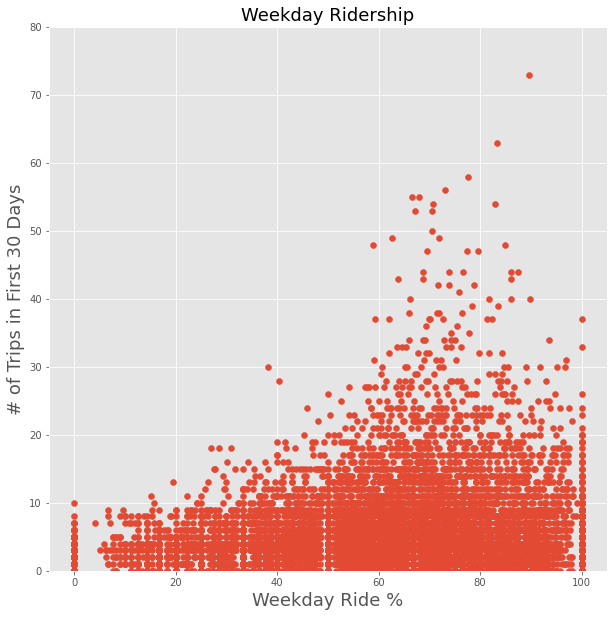

In [349]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df_clean_1['weekday_pct'],df_clean_1['trips_in_first_30_days'])
ax.set_xlabel('Weekday Ride %',fontsize=18)
ax.set_ylabel('# of Trips in First 30 Days',fontsize=18)
ax.set_title('Weekday Ridership',fontsize=18)
ax.set_ylim([0,80])


(0.0, 80.0)

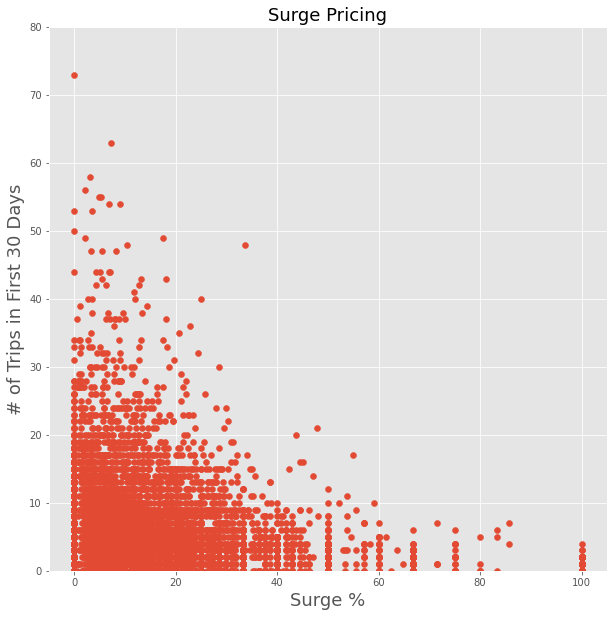

In [345]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df_clean_1['surge_pct'],df_clean_1['trips_in_first_30_days'])
ax.set_xlabel('Surge %',fontsize=18)
ax.set_ylabel('# of Trips in First 30 Days',fontsize=18)
ax.set_title('Surge Pricing',fontsize=18)
ax.set_ylim([0,80])

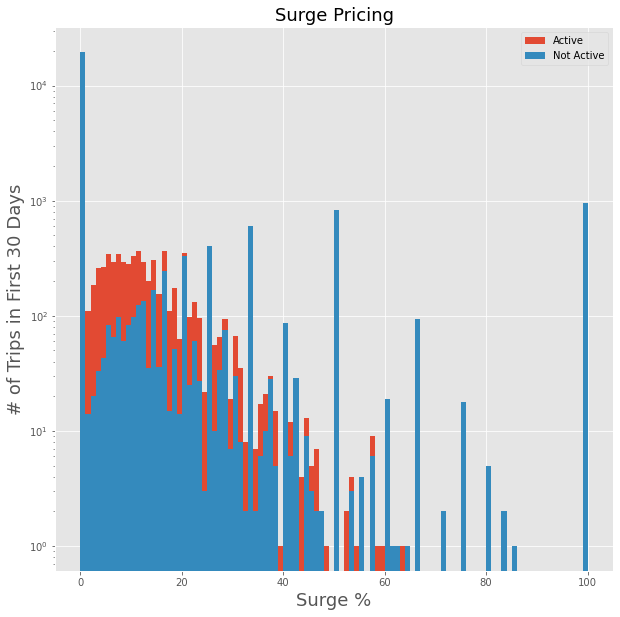

In [358]:
active = df_clean_1[df_clean_1['active'] == 1]
not_active = df_clean_1[df_clean_1['active'] == 0]

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(active['surge_pct'],bins = 100,label='Active')
ax.hist(not_active['surge_pct'],bins = 100,label='Not Active')
ax.set_xlabel('Surge %',fontsize=18)
ax.set_ylabel('Frequency',fontsize=18)
ax.set_title('Surge Pricing',fontsize=18)
ax.set_yscale('log')
ax.legend()


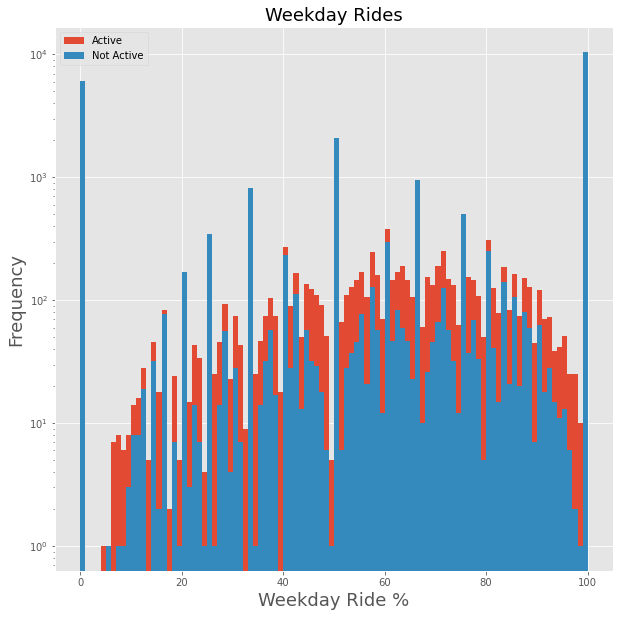

In [360]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(active['weekday_pct'],bins = 100,label='Active')
ax.hist(not_active['weekday_pct'],bins = 100,label='Not Active')
ax.set_xlabel('Weekday Ride %',fontsize=18)
ax.set_ylabel('Frequency',fontsize=18)
ax.set_title('Weekday Rides',fontsize=18)
ax.set_yscale('log')
ax.legend()

(0.0, 80.0)

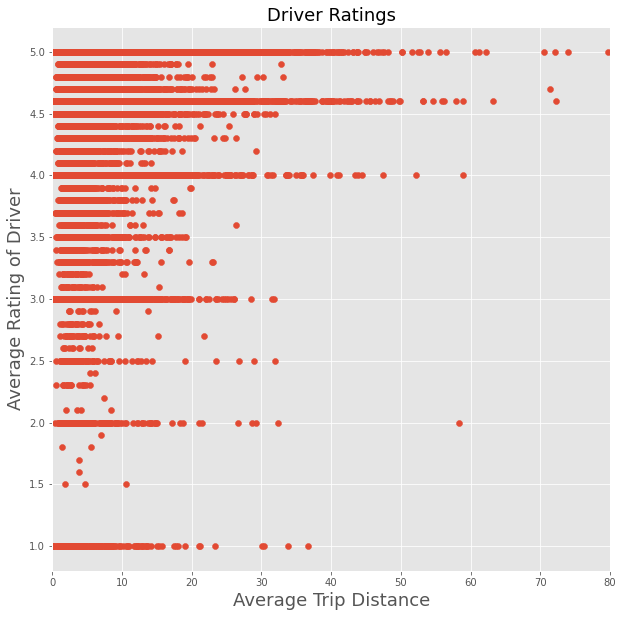

In [346]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df_clean_1['avg_dist'],df_clean_1['avg_rating_of_driver'])
ax.set_xlabel('Average Trip Distance',fontsize=18)
ax.set_ylabel('Average Rating of Driver',fontsize=18)
ax.set_title('Driver Ratings',fontsize=18)
ax.set_xlim([0,80])


Text(0.5, 1.0, 'Cities')

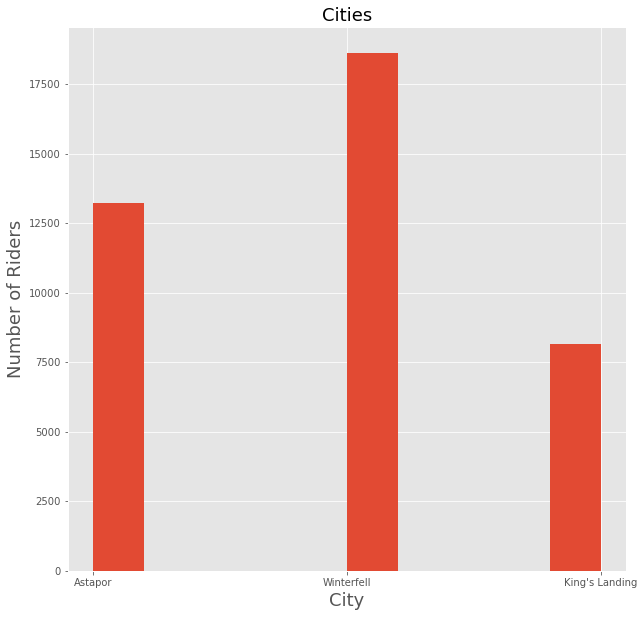

In [324]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(df['city'])
ax.set_xlabel('City',fontsize=18)
ax.set_ylabel('Number of Riders',fontsize=18)
ax.set_title('Cities',fontsize=18)


In [325]:
len(list(df['city']))

40000

In [326]:
import datetime as dt
df_clean_1['signup_date'] = pd.to_datetime(df_clean_1['signup_date'])
df_clean_1['signup_date']=df_clean_1['signup_date'].map(dt.datetime.toordinal)

In [327]:
df_clean_1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active,city_King's Landing,city_Winterfell
0,6.94,5.0,5.000000,1.00,0,735245,0.0,0,0,100.0,0,0,0
1,8.06,5.0,5.000000,1.00,0,735258,0.0,2,1,0.0,0,0,0
2,21.50,4.0,4.601697,1.00,1,735235,0.0,1,1,100.0,0,0,1
3,9.46,5.0,4.601697,2.75,0,735242,100.0,1,0,100.0,0,0,1
4,13.77,5.0,4.601697,1.00,1,735264,0.0,0,0,100.0,0,0,1


In [328]:
## Gradient Boosting Classfier

df_X = df_clean_1.drop(columns='active')
df_y = df_clean_1['active']

# train-test split
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y)

# select model parameters
model = GradientBoostingClassifier(learning_rate=0.1,
                                  n_estimators=100,
                                  random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
accuracy = model.score(X_test,y_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(f'The accuracy of the model is {accuracy}')
print(f'The precision of the model is {precision}')
print(f'The recall of the model is {recall}')


The accuracy of the model is 0.7834895675839129
The precision of the model is 0.7353463587921847
The recall of the model is 0.6645264847512039


In [329]:
gradient_boost_grid = {'max_depth': [None, 5],
                      'max_features': ['sqrt', None],
                      'min_samples_leaf': [4,8,None],
                      'n_estimators': [80, 100],
                      'random_state': [1],
                      'learning_rate': [0.03,0.05]}

gb_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gradient_boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
gb_gridsearch.fit(X_train, y_train)

print ("best parameters:", gb_gridsearch.best_params_)

best_gb_model = gb_gridsearch.best_estimator_
best_gb_model


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


KeyboardInterrupt: 

In [175]:
gradient_boost_grid = {'max_depth': [5, 10, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_leaf': [1, 4, None],
                      'n_estimators': [60,80],
                      'random_state': [1],
                      'learning_rate': [0.02,0.05]}

gb_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                             gradient_boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
gb_gridsearch.fit(X_train, y_train)

print ("best parameters:", gb_gridsearch.best_params_)

best_gb_model = gb_gridsearch.best_estimator_
best_gb_model


Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.0min
/Users/kaelynnrose/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  9.0min finished


best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 150, 'random_state': 1}


GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, n_estimators=150,
                          random_state=1)

In [330]:
df_X = df_clean_1.drop(columns='active')
df_y = df_clean_1['active']

# train-test split
X_train,X_test,y_train,y_test = train_test_split(df_X,df_y)

# select model parameters
model = GradientBoostingClassifier(learning_rate=0.1,
                                  max_depth=5,
                                  max_features=None,
                                  min_samples_leaf = 8,
                                  n_estimators=100,
                                  random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
accuracy = model.score(X_test,y_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(f'The accuracy of the model is {accuracy}')
print(f'The precision of the model is {precision}')
print(f'The recall of the model is {recall}')

The accuracy of the model is 0.7828847898397339
The precision of the model is 0.7334520629266845
The recall of the model is 0.6629997316876844


In [331]:
n_estimators = 100
n_folds = 5
learning_rates = [1,0.5,0.1,0.025,0.01]
n_learning_rates = len(learning_rates)

train_scores = np.zeros((n_folds, n_learning_rates, n_estimators))
test_scores = np.zeros((n_folds, n_learning_rates, n_estimators))

folds = cv.KFold(n_splits=n_folds, shuffle=True, random_state=1)

Xt = X_train.copy()
yt = y_train.copy()

for k, (train_idxs, test_idxs) in enumerate(folds.split(Xt)):
    Xt_train, yt_train = Xt.iloc[train_idxs, :], yt.iloc[train_idxs]
    Xt_test, yt_test = Xt.iloc[test_idxs, :], yt.iloc[test_idxs]
    models = [GradientBoostingClassifier(learning_rate=lr,
                                  max_depth=5,
                                  max_features=None,
                                  min_samples_leaf = 8,
                                  n_estimators=100,
                                  random_state=1) for lr in learning_rates]
    for model in models:
        model.fit(Xt_train,yt_train)
    for i, model in enumerate(models):
        for j, yt_pred in enumerate(model.staged_predict(Xt_train)):
            train_scores[k,i,j] = recall_score(yt_train,yt_pred)
    for i, model in enumerate(models):
        for j, yt_pred in enumerate(model.staged_predict(Xt_test)):
            test_scores[k,i,j] = recall_score(yt_test,yt_pred)
            
mean_train_scores = np.mean(train_scores, axis=0)
mean_test_scores = np.mean(test_scores, axis=0)


Text(0.5, 1.0, 'Testing Error')

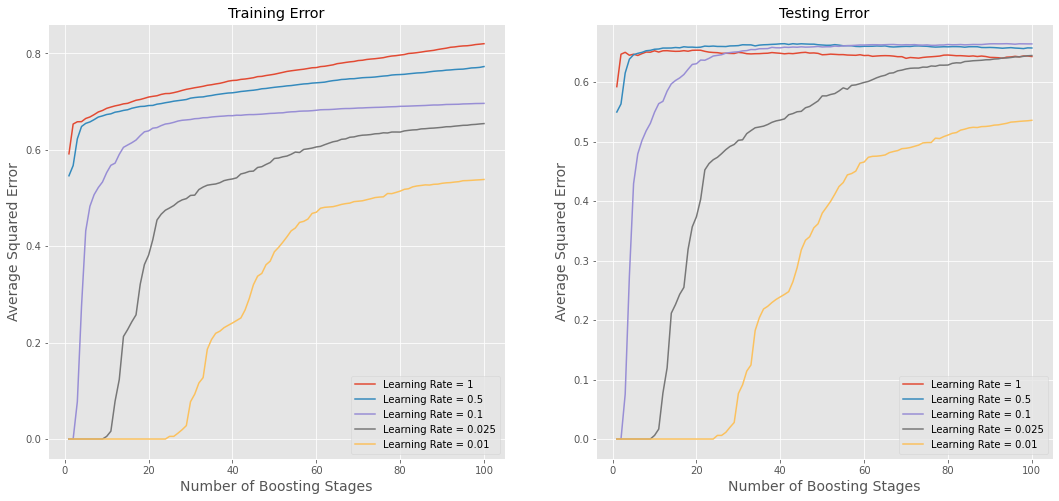

In [332]:
fig, axs = plt.subplots(1,2,figsize=(18,8))
for i, rate in enumerate(learning_rates):
    axs[0].plot(np.arange(n_estimators)+1,mean_train_scores[i,:], label='Learning Rate = ' + str(rate))
    axs[1].plot(np.arange(n_estimators)+1,mean_test_scores[i,:], label='Learning Rate = ' + str(rate))   
    
for ax in axs:
    ax.legend()
    ax.set_xlabel('Number of Boosting Stages',fontsize=14)
    ax.set_ylabel('Average Squared Error',fontsize=14)
axs[0].set_title('Training Error')
axs[1].set_title('Testing Error')

Text(0.5, 1.0, 'Testing Accuracy')

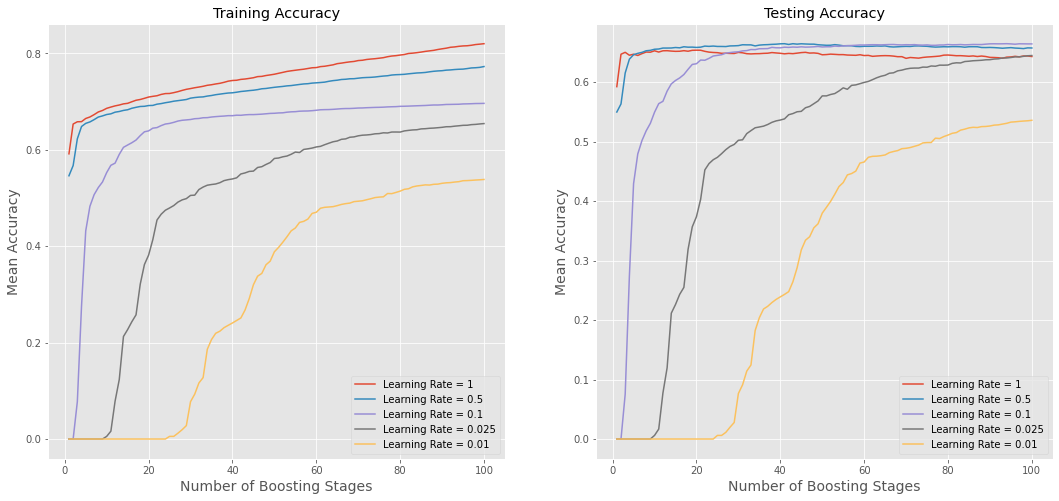

In [333]:
fig, axs = plt.subplots(1,2,figsize=(18,8))
for i, rate in enumerate(learning_rates):
    axs[0].plot(np.arange(n_estimators)+1,mean_train_scores[i,:], label='Learning Rate = ' + str(rate))
    axs[1].plot(np.arange(n_estimators)+1,mean_test_scores[i,:], label='Learning Rate = ' + str(rate))   
    
for ax in axs:
    ax.legend()
    ax.set_xlabel('Number of Boosting Stages',fontsize=14)
    ax.set_ylabel('Mean Accuracy',fontsize=14)
axs[0].set_title('Training Accuracy')
axs[1].set_title('Testing Accuracy')

Text(0.5, 1.0, 'Testing Recall')

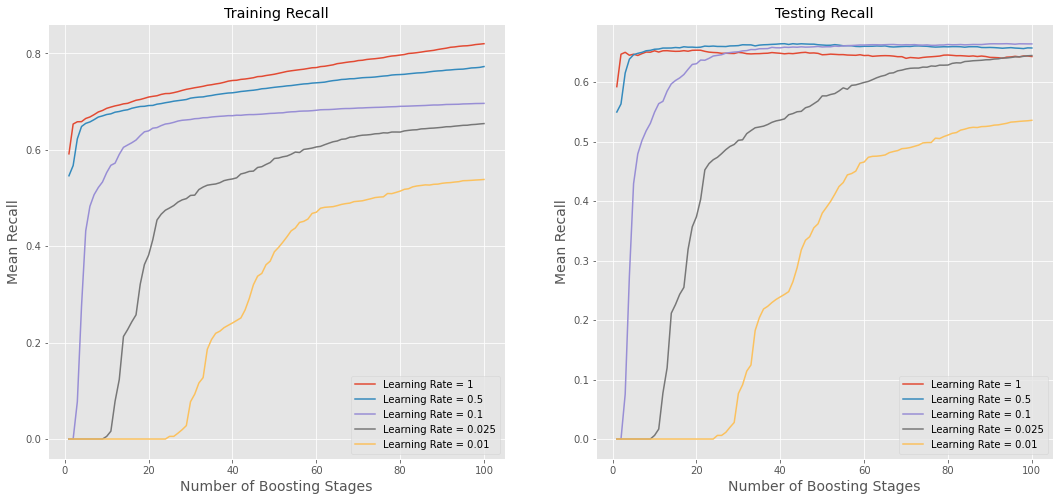

In [334]:
fig, axs = plt.subplots(1,2,figsize=(18,8))
for i, rate in enumerate(learning_rates):
    axs[0].plot(np.arange(n_estimators)+1,mean_train_scores[i,:], label='Learning Rate = ' + str(rate))
    axs[1].plot(np.arange(n_estimators)+1,mean_test_scores[i,:], label='Learning Rate = ' + str(rate))   
    
for ax in axs:
    ax.legend()
    ax.set_xlabel('Number of Boosting Stages',fontsize=14)
    ax.set_ylabel('Mean Recall',fontsize=14)
axs[0].set_title('Training Recall')
axs[1].set_title('Testing Recall')

Text(0, 0.5, 'Feature Name')

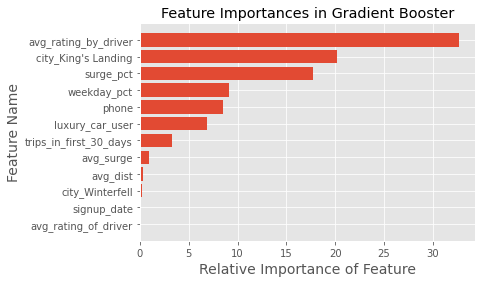

In [335]:
names = X_train.columns
feature_importances = 100 * model.feature_importances_ / np.sum(model.feature_importances_)
feature_importances, feature_names, feature_idxs = \
    zip(*sorted(zip(feature_importances, names, range(len(names)))))
width = 0.8

idx = np.arange(len(names))
plt.barh(idx, feature_importances, align='center')
plt.yticks(idx, feature_names)

plt.title("Feature Importances in Gradient Booster")
plt.xlabel('Relative Importance of Feature', fontsize=14)
plt.ylabel('Feature Name', fontsize=14)


In [336]:
names

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'phone', 'signup_date', 'surge_pct', 'trips_in_first_30_days',
       'luxury_car_user', 'weekday_pct', 'city_King's Landing',
       'city_Winterfell'],
      dtype='object')

In [337]:
df_test = pd.read_csv("data/churn_test.csv")
df_test['last_trip_date'] = pd.to_datetime(df_test['last_trip_date'])
(df_test['last_trip_date'] >= pd.to_datetime('2014-06-01')) & (df_test['last_trip_date'] <= pd.to_datetime('2014-07-01'))
df_test['active'] = (df_test['last_trip_date'] >= pd.to_datetime('2014-06-01')) & (df_test['last_trip_date'] <= pd.to_datetime('2014-07-01'))
df_test['active'] = df_test['active'].map(lambda x: 1 if x == True else 0)
df_test['luxury_car_user'] = df_test['luxury_car_user'].map(lambda x: 1 if x == True else 0)
df_test_clean = df_test.drop('last_trip_date',axis=1)
df_test_clean['avg_rating_of_driver'] = df_test_clean['avg_rating_of_driver'].map(lambda x: df_test_clean['avg_rating_of_driver'].mean() if np.isnan(x) else x)
df_test_clean = df_test_clean[df_test_clean['phone'].notna()]
df_test_clean['avg_rating_by_driver'] = df_test_clean['avg_rating_by_driver'].map(lambda x: df_test_clean['avg_rating_by_driver'].mean() if np.isnan(x) else x)
df_test_clean['phone'] = df_test_clean['phone'].map(lambda x: 0 if x == 'Android' else 1)
df_test_clean_1 = pd.get_dummies(df_test_clean,columns = ['city'])
df_test_clean_1 = df_test_clean_1.drop('city_Astapor',axis=1)
df_test_clean_1['signup_date'] = pd.to_datetime(df_test_clean_1['signup_date'])
df_test_clean_1['signup_date']=df_test_clean_1['signup_date'].map(dt.datetime.toordinal)

In [338]:
df_test_clean_1.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active,city_King's Landing,city_Winterfell
0,2.48,5.0,5.000000,1.0,0,735239,0.0,2,1,100.0,0,0,1
1,10.81,5.0,5.000000,1.0,1,735239,0.0,3,1,100.0,0,0,1
2,12.95,5.0,5.000000,1.0,0,735252,0.0,1,1,100.0,0,0,0
3,3.92,5.0,4.601011,1.0,1,735242,0.0,0,0,0.0,0,0,1
4,1.46,5.0,4.500000,1.0,1,735240,0.0,2,0,100.0,0,0,0


In [339]:
X_train = df_clean_1.drop(columns='active')
y_train = df_clean_1['active']

X_test = df_test_clean_1.drop(columns='active')
y_test = df_test_clean_1['active']

In [340]:
# select model parameters
model = GradientBoostingClassifier(learning_rate=0.1,
                                  max_depth=5,
                                  max_features=None,
                                  min_samples_leaf = 8,
                                  n_estimators=100,
                                  random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
accuracy = model.score(X_test,y_test)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(f'The accuracy of the model is {accuracy}')
print(f'The precision of the model is {precision}')
print(f'The recall of the model is {recall}')

The accuracy of the model is 0.7837347576337801
The precision of the model is 0.7415730337078652
The recall of the model is 0.6534653465346535


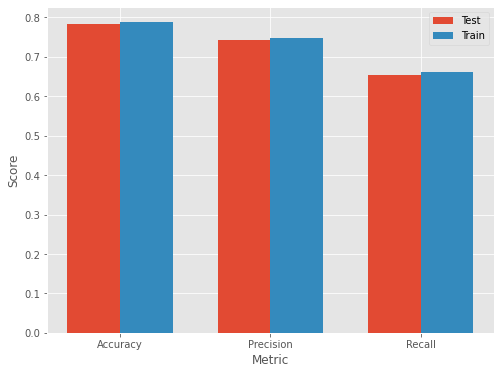

In [341]:
metrics1 = [accuracy,precision,recall]
labels1 = ['Accuracy','Precision','Recall']
metrics2 = [0.7880254006652555,0.7484903381642513,0.6612429981328354]

x = np.arange(len(labels))  # the label locations
fig, ax = plt.subplots(figsize=(8,6))
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, metrics1, width, label='Test')
rects2 = ax.bar(x + width/2, metrics2, width, label='Train')
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels)
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.legend()


Text(0, 0.5, 'Feature Name')

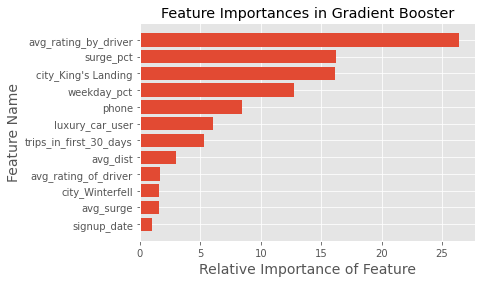

In [342]:
names = X_train.columns
feature_importances = 100 * model.feature_importances_ / np.sum(model.feature_importances_)
feature_importances, feature_names, feature_idxs = \
    zip(*sorted(zip(feature_importances, names, range(len(names)))))
width = 0.8

idx = np.arange(len(names))
plt.barh(idx, feature_importances, align='center')
plt.yticks(idx, feature_names)

plt.title("Feature Importances in Gradient Booster")
plt.xlabel('Relative Importance of Feature', fontsize=14)
plt.ylabel('Feature Name', fontsize=14)

In [343]:
metrics2

[0.7880254006652555, 0.7484903381642513, 0.6612429981328354]